# 목차
<hr/>

<ol>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;">필요한 모듈 불러오기</i>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 1</span> : 스티커 구하기 or 만들기</i></li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 2</span> : 얼굴 검출 하기</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 이미지 준비 및 RGB변환하기</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 이미지의 얼굴 영역 찾기</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 3</span> : landmark 모델을 이용하여 랜드마크 검출 하기</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> landmark 모델 불러오기</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> face landmark 찾기</li>
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> face landmark 출력해보기</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 4</span> : 스티커 적용 위치 확인하기</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 계산할 수치의 공식</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 스티커의 위치 및 크기 구하기</li>
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> 준비해 둔 스티커 이미지를 읽어서 적용해보기</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 5</span> : bounding box와 landmark를 제거하여 출력하기</i></li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 6</span> : 문제점 찾아보기</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 얼굴 각도에 따른 영향도</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 밝기에 따른 영향도</li>
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> 촬영 거리에 따른 영향도</li>
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">4. </span> 다른 사진 가져와 스티커 붙여보기</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;">회고</i>
</ol>

<div style = "height: 50px;"></div>

# 필요한 모듈 불러오기

In [1]:
import cv2
import dlib
import os

import matplotlib.pyplot as plt
import numpy             as np

<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 1</span> : 스티커 구하기 or 만들기

#### 사용할 스티커 이미지

<img src = "data/cat.png" style = "width:30%;">

#### 사용할 얼굴 이미지

<img src = "data/face02_1.jpg" style = "width:70%;">

<p style= "font-size:15px; line-height:24px;">눈이 큰 사람은 더 face marker를 잘 잡을 것 같아 본인의 사진이 아닌 다른 사람의 사진을 가져왔다.</p>

<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 2</span> :  얼굴 검출 하기

## 1. 이미지 준비 및 RGB변환하기
<hr/>

<p style= "font-size:15px; line-height:24px;">dlib는 입력 이미지가 RGB여야 하므로, 원본 이미지를 따로 변수에 저장한 후, cv2.cvtColor()를 이용하여 RGB로 바꿔준다.</p>

In [2]:
img_path = 'data/face02_1.jpg'

img_bgr = cv2.imread(img_path) # OpenCV로 이미지 불러오기 (원본)
img_show = img_bgr.copy()  # RGB변환 할 이미지 새로운 변수 지정하기

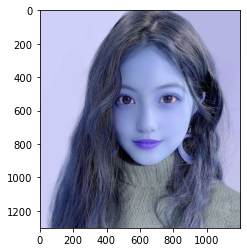

In [3]:
# 원본 이미지 확인해보기
plt.imshow(img_bgr)
plt.show()

<p style= "font-size:15px; line-height:24px;">OpenCV는 RGB가 아닌, BGR을 사용하므로 역시 사진이 파랗게 나온다.</p>

<div style = "height: 50px;"></div>

### BGR을 RGB로 변환하기

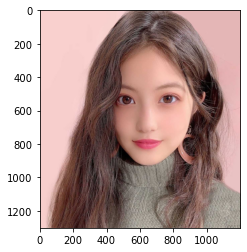

In [4]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

<p style= "font-size:15px; line-height:24px;">RGB로 변환하니 이미지가 정상적으로 나오는 것을 확인하였다.</p>

<div style = "height: 50px;"></div>

## 2. 이미지의 얼굴 영역 찾기
<hr/>

<p style= "font-size:15px; line-height:24px;">이미지의 얼굴 영역은  dlib.get_frontal_face_detector()로 찾을 수 있다.<br/>
쉽게 사용하기 위해 변수를 따로 지정할 것이다.</p>

### detector_hog 변수 선언

In [5]:
detector_hog = dlib.get_frontal_face_detector()

<div style = "height: 25px;"></div>

### detector_hog를 이용해서 얼굴의 bounding box를 추출

In [6]:
dlib_rects = detector_hog(img_rgb, 1)

<p style= "font-size:15px; line-height:24px;"><span style = 'background-color:#fff5b1; padding:0.2px;'>detector_hog의 두 번째 파라미터는 이미지 피라미드의 수이다.</span><br/>   
이미지를 upsampling 방법을 통해 크기를 키우는 것을 이미지 피라미드라고 한다.    
이미지 피라미드에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능하다.</p>

<div style = "height: 25px;"></div>

### 찾은 얼굴을 화면에 출력하기

In [7]:
# 찾은 얼굴의 값
print(dlib_rects)

rectangles[[(356, 357) (911, 911)]]


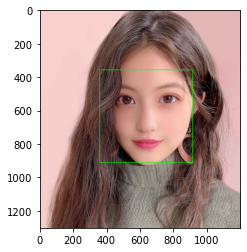

In [8]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType = cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

<p style= "font-size:15px; line-height:24px;">plt로 출력해본 결과, 얼굴의 영역을 잘 찾은 것을 확인할 수 있었다.</p>

> #### cv2.rectangle?
> - OpenCV에서 이미지 또는 영상에 사각형을 그리는 함수이다.<br/>
> - 참고 링크 : [OpenCV의 그리기 함수들](https://deep-learning-study.tistory.com/105)

<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 3</span> : landmark 모델을 이용하여 랜드마크 검출 하기

## 1. landmark 모델 불러오기
<hr/>

In [9]:
model_path = 'data/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

<p style= "font-size:15px; line-height:24px;">인식된 영역(얼굴 검출 사각형)을 입력받아 랜드마크의 위치를 타나내는 클래스를 <span style = 'background-color:#fff5b1; padding:0.2px;'>landmark_predictor</span> 변수에 할당한 것이다.</p>

- [dlib 참고 링크](http://dlib.net/python/index.html#dlib_pybind11.full_object_detection)

<div style = "height: 50px;"></div>

## 2. face landmark 찾기
<hr/>

In [10]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    
    list_points = list(map(lambda p : (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

    print(len(list_landmarks[0]))

68


<ul>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">points</span> : 인식된 얼굴 영역을 입력값으로 하여 landmark_predictor를 실행시킨 값</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">list_points</span> : (x, y) 형태로 변환한 face landmark의 위치</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">list_landmarks</span> : 총 68개의 face landmark의 좌표 list</li>
</ul>

#### 왜 face landmark의 개수가 68개인가?

<img src = "img/05.png" style = "width:60%;">

<p style = "margin-bottom:0px; text-align:center; color:gray;">[Dlib에 사용 되는 랜드마크 순서]</p>

<p style= "font-size:15px; line-height:24px;">landmark 모델은 랜드마크를 총 68개를 찾아내므로 68개이다.<br/>
고양이 수염 스티커를 붙이기에, 33번은 너무 아래이므로 30번이 적당할 것 같다고 판단하였다.<br/>
따라서, <span style = 'background-color:#fff5b1; padding:0.2px;'>x, y값은 landmark[30]을 기준으로 찾을 것이다.</span></p>

<div style = "height: 50px;"></div>

## 4. face landmark 출력해보기
<hr/>

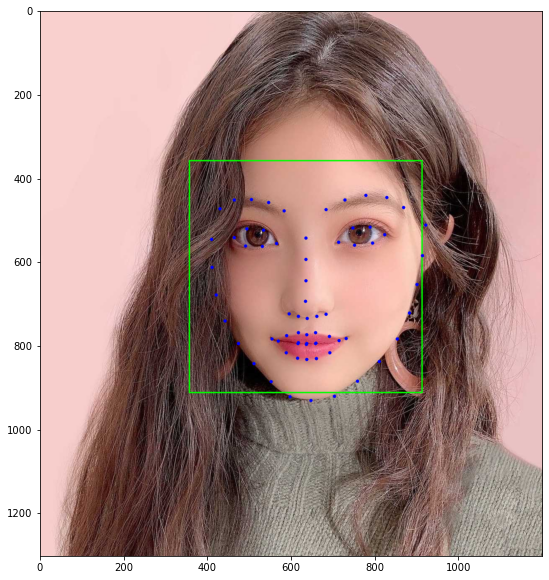

In [11]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 4, (255, 0, 0), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (9, 15))
plt.imshow(img_show_rgb)
plt.show()

<p style= "font-size:15px; line-height:24px;">face landmark를 더 잘 볼 수 있도록, radius 값을 3으로 지정하여 점의 크기를 늘렸다.</p>

<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 4</span> : 스티커 적용 위치 확인하기

## 1. 계산할 수치의 공식
<hr/>

### (1) 스티커 위치

$$x = {landmark[30]}$$<br/>
$$ y = landmark[30] -  \frac {height} 2 $$

<div style = "height: 25px;"></div>

### (2) 스티커의 크기

$$ width = dlib_rect.width $$
$$ height = dlib_rect.width $$

<div style = "height: 50px;"></div>

## 2. 스티커의 위치 및 크기 구하기
<hr/>

In [12]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print('스티커 붙일 위치 좌표', landmark[30]) 
    
    x = landmark[30][0]  # x_nose값
    y = landmark[30][1] - dlib_rect.height() // 2
    w = dlib_rect.width()
    h = dlib_rect.height()
    
    print('(x, y) 값 : (%d, %d)'%(x, y))
    print('스티커의 크기 (w, h) : (%d, %d)'%(w, h))

스티커 붙일 위치 좌표 (633, 693)
(x, y) 값 : (633, 416)
스티커의 크기 (w, h) : (556, 555)


<p style= "font-size:15px; line-height:24px;">얼굴 이미지에서는 <span style = 'background-color:#fff5b1; padding:0.2px;'>landmark 30번의 중심점이 (633, 693) 로 나왔다.</span><br/> 
y에 dlib_rect.height()값을 2로 나누어서, y의 값을 30번 좌표를 이미지 시작점이 아닌 30번 좌표를 중앙 값으로 설정한 것이다.   
= (얼굴 영역의 높이 값 / 2)</p>

<img src = "img/height_y.png" style = "width:80%;">

<div style = "height: 50px;"></div>

## 3. 준비해 둔 스티커 이미지를 읽어서 적용해보기
<hr/>

### 스티커 이미지 불러오기

In [13]:
sticker_path = 'data/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print('조정된 스티커의 크기 값 : ', img_sticker.shape)

조정된 스티커의 크기 값 :  (555, 556, 3)


<div style = "height: 25px;"></div>

### 원본 이미지에 스티커 이미지를 추가하기 위해 x, y 좌표를 조정하기

In [14]:
refined_x = x - w // 2
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (355,416)


<p style= "font-size:15px; line-height:24px;">y의 값은 이미 위에서 설정했기 때문에, 따로 지정하지 않아도 된다.
x 값의 변화는 이미지를 참고하자.
이렇게 x, y값을 조정하여 최종적으로 스티커를 이미지에 붙였을 때, 스티커의 뒷 배경의 좌표를 얻을 수 있었다. ( = sticker_area)</p>

<img src = "img/width_x.png" style = "width:78%">

<div style = "height: 25px;"></div>

### 원본 이미지에 스티커를 적용하기 전, 이미지 전처리 하기

In [15]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y : refined_y + img_sticker.shape[0], 
                        refined_x : refined_x + img_sticker.shape[1]]

sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 이다.   

In [16]:
img_show[refined_y : refined_y + img_sticker.shape[0],
         refined_x : refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)

<div style = "height: 25px;"></div>

#### sticker_area?

<p style= "font-size:15px; line-height:24px;">스티커 이미지를 붙였을 때, 스티커의 영역이 흰색(255, 255, 255)일 경우, 원본 이미지에서 스티커를 적용할 위치만큼 잘라 흰색 대신 사용한다는 뜻이다. 

(355, 416) 부터 (355 + 556 , 416 + 555) 범위의 이미지를 의미한다.</p>

<img src = "img/sticker_area.png">

In [17]:
img_sticker.shape

(555, 556, 3)

In [18]:
w

556

In [19]:
h

555

<p style= "font-size:15px; line-height:24px;">w값과 height값을 확인해본 결과,<br/>
각각 img_sticker.shape[0]과 img_sticker.shape[1]에 해당하는 값을 가지고 있는 것을 확인하였다.</p>

<div style = "height: 25px;"></div>

#### np.where함수?

In [20]:
type(img_sticker)

numpy.ndarray

<p style= "font-size:15px; line-height:24px;">img_sticker의 타입은 np.array이다.
따라서, where함수를 쓰게 되는데, where함수는 정의한 조건문에 해당하는 값을 변경하거나 출력할 수 있다.<br/><br/>
LMS 노드에서는 img_sticker == 0일 때 (이미지 픽셀 값이 0일 때) sticker_area를 사용했고,<br/>
img_sticker != 0일 때는 img_sticker를 사용하였다.<br/><br/>
따라서, 고양이 수염의 색을 출력했을 때, 흰색은 (255, 255, 255)이고, 검은색은(0, 0, 0)이므로, 조건문을 img_sticker == 0이 아닌 img_sticker == 255로 설정하여 sticker_area를 사용해야 한다.</p>

<div style = "height: 25px;"></div>

### 원본 이미지에 스티커 붙이기

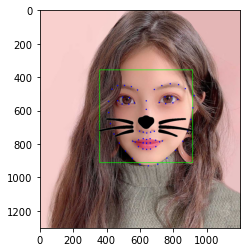

In [21]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

plt.show()로 출력한 결과, 잘 붙어있는 것을 확인할 수 있었다.

<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 5</span> : bounding box와 landmark를 제거하여 출력하기

In [22]:
# mg_show[from:to] 형식
sticker_area = img_bgr[refined_y : refined_y + img_sticker.shape[0], 
                        refined_x : refined_x + img_sticker.shape[1]]

In [23]:
img_bgr[refined_y : refined_y + img_sticker.shape[0],
         refined_x : refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)

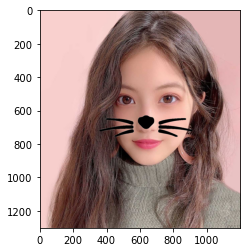

In [24]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

<p style= "font-size:15px; line-height:24px;">bounding box와 landmark를 그리지 않은 원본 이미지를 불러와서 sticker_area를 지정한 후, 스티커를 붙일 범위를 지정하여 스티커를 붙였다.
이 후 RGB로 변환하여 plt.show()하였다.</p>

<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 6</span> : 문제점 찾아보기


## 1. 얼굴 각도에 따른 영향도

- 기울기만 다른 같은 이미지를 불러와 작업을 해보겠다.

### (1) 이미지 준비 및 RGB변환하기
<hr/>

In [25]:
img_path = 'data/face02.jpg'
img_bgr = cv2.imread(img_path) # OpenCV로 이미지 불러오기 (원본)
img_show = img_bgr.copy()  # RGB변환 할 이미지 새로운 변수 지정하기

<div style = "height: 25px;"></div>

#### BGR을 RGB로 변환하기

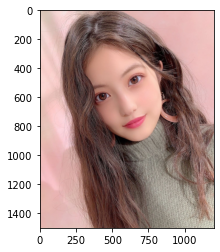

In [26]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

<div style = "height: 50px;"></div>

### 2. 이미지의 얼굴 영역 찾기
<hr/>

#### detector_hog 변수 선언

In [27]:
detector_hog = dlib.get_frontal_face_detector()

<div style = "height: 25px;"></div>

#### detector_hog를 이용해서 얼굴의 bounding box를 추출

In [28]:
dlib_rects = detector_hog(img_rgb, 1)

<div style = "height: 25px;"></div>

#### 찾은 얼굴을 화면에 출력하기

In [29]:
# 찾은 얼굴의 값
print(dlib_rects)

rectangles[[(295, 357) (849, 911)]]


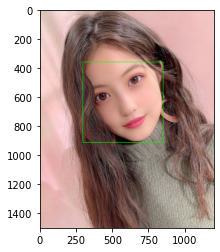

In [30]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType = cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

<div style = "height: 50px;"></div>

### 3. face landmark 찾기
<hr/>

In [31]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    
    list_points = list(map(lambda p : (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

    print(len(list_landmarks[0]))

68


<div style = "height: 50px;"></div>

### 4. face landmark 출력해보기
<hr/>

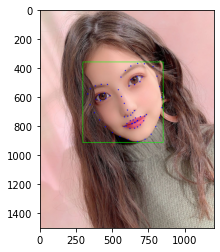

In [32]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 4, (255, 0, 0), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

<div style = "height: 50px;"></div>

### 5. 스티커의 위치 및 크기 구하기
<hr/>

In [33]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print('스티커 붙일 위치 좌표', landmark[30]) 
    
    x = landmark[30][0]  # x_nose값
    y = landmark[30][1] - dlib_rect.height() // 2
    w = dlib_rect.width()
    h = dlib_rect.height()
    
    print('(x, y) 값 : (%d, %d)'%(x, y))
    print('스티커의 크기 (w, h) : (%d, %d)'%(w, h))

스티커 붙일 위치 좌표 (603, 688)
(x, y) 값 : (603, 411)
스티커의 크기 (w, h) : (555, 555)


<div style = "height: 50px;"></div>

### 6. 준비해 둔 스티커 이미지를 읽어서 적용해보기
<hr/>

#### 스티커 이미지 불러오기

In [34]:
sticker_path = 'data/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print('조정된 스티커의 크기 값 : ', img_sticker.shape)

조정된 스티커의 크기 값 :  (555, 555, 3)


<div style = "height: 25px;"></div>

#### 원본 이미지에 스티커 이미지를 추가하기 위해 x, y 좌표를 조정하기

In [35]:
refined_x = x - w // 2
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (326,411)


<div style = "height: 25px;"></div>

#### 원본 이미지에 스티커를 적용하기 전, 이미지 전처리 하기

In [36]:
# mg_show[from:to] 형식
sticker_area = img_bgr[refined_y : refined_y + img_sticker.shape[0], 
                        refined_x : refined_x + img_sticker.shape[1]]

In [37]:
img_bgr[refined_y : refined_y + img_sticker.shape[0],
         refined_x : refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)

<div style = "height: 25px;"></div>

#### 원본 이미지에 스티커 붙이기

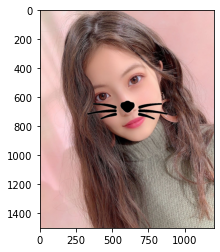

In [38]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

<p style= "font-size:15px; line-height:24px;">확인해본 결과, landmark는 사진의 기울기에 따라 잘 인식한 것을 확인할 수 있었으나, 스티커는 사진의 기울기에 맞춰 기울어 붙여지지 않은 것을 확인할 수 있었다.</p>

<div style = "height: 50px;"></div>

## 2. 밝기에 따른 영향도

- 같은 이미지를 밝기를 밝게 하여 편집한 후 불러와 작업을 해보겠다.

### (1) 이미지 준비 및 RGB변환하기
<hr/>

In [95]:
img_path = 'data/face02_2.jpg'
img_bgr = cv2.imread(img_path) # OpenCV로 이미지 불러오기 (원본)
img_show = img_bgr.copy()  # RGB변환 할 이미지 새로운 변수 지정하기

<div style = "height: 25px;"></div>

#### BGR을 RGB로 변환하기

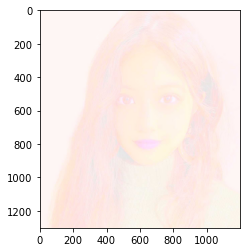

In [96]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

<div style = "height: 50px;"></div>

### 2. 이미지의 얼굴 영역 찾기
<hr/>

#### detector_hog 변수 선언

In [97]:
detector_hog = dlib.get_frontal_face_detector()

<div style = "height: 25px;"></div>

#### detector_hog를 이용해서 얼굴의 bounding box를 추출

In [98]:
dlib_rects = detector_hog(img_rgb, 1)

<div style = "height: 25px;"></div>

#### 찾은 얼굴을 화면에 출력하기

In [99]:
# 찾은 얼굴의 값
print(dlib_rects)

rectangles[[(356, 357) (911, 911)]]


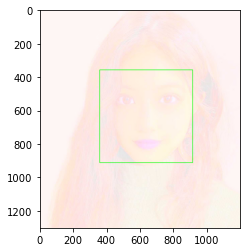

In [100]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType = cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

<div style = "height: 50px;"></div>

### 3. face landmark 찾기
<hr/>

In [101]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    
    list_points = list(map(lambda p : (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

    print(len(list_landmarks[0]))

68


<div style = "height: 50px;"></div>

### 4. face landmark 출력해보기
<hr/>

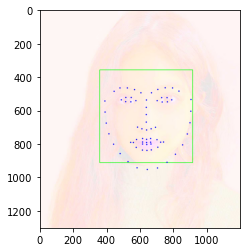

In [102]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 4, (255, 0, 0), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

<div style = "height: 50px;"></div>

### 5. 스티커의 위치 및 크기 구하기
<hr/>

In [103]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print('스티커 붙일 위치 좌표', landmark[30]) 
    
    x = landmark[30][0]  # x_nose값
    y = landmark[30][1] - dlib_rect.height() // 2
    w = dlib_rect.width()
    h = dlib_rect.height()
    
    print('(x, y) 값 : (%d, %d)'%(x, y))
    print('스티커의 크기 (w, h) : (%d, %d)'%(w, h))

스티커 붙일 위치 좌표 (634, 669)
(x, y) 값 : (634, 392)
스티커의 크기 (w, h) : (556, 555)


<div style = "height: 50px;"></div>

### 6. 준비해 둔 스티커 이미지를 읽어서 적용해보기
<hr/>

#### 스티커 이미지 불러오기

In [104]:
sticker_path = 'data/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print('조정된 스티커의 크기 값 : ', img_sticker.shape)

조정된 스티커의 크기 값 :  (555, 556, 3)


<div style = "height: 25px;"></div>

#### 원본 이미지에 스티커 이미지를 추가하기 위해 x, y 좌표를 조정하기

In [105]:
refined_x = x - w // 2
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (356,392)


<div style = "height: 25px;"></div>

#### 원본 이미지에 스티커를 적용하기 전, 이미지 전처리 하기

In [106]:
# mg_show[from:to] 형식
sticker_area = img_bgr[refined_y : refined_y + img_sticker.shape[0], 
                        refined_x : refined_x + img_sticker.shape[1]]

In [107]:
img_bgr[refined_y : refined_y + img_sticker.shape[0],
         refined_x : refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)

<div style = "height: 25px;"></div>

#### 원본 이미지에 스티커 붙이기

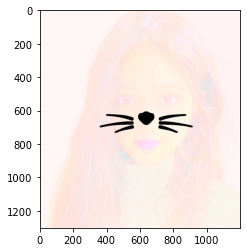

In [108]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

<p style= "font-size:15px; line-height:24px;">확인해본 결과, 놀랍게도 landmark는 밝기를 높인 사진에서도 잘 인식한 것을 확인할 수 있었다.</p>

<div style = "height: 50px;"></div>

## 3. 촬영 거리에 따른 영향도

- 같은 이미지를 편집한 후 불러와 작업진행하였다.

### (1) 이미지 준비 및 RGB변환하기
<hr/>

In [123]:
img_path = 'data/face02_3.jpg'
img_bgr = cv2.imread(img_path) # OpenCV로 이미지 불러오기 (원본)
img_show = img_bgr.copy()  # RGB변환 할 이미지 새로운 변수 지정하기

<div style = "height: 25px;"></div>

#### BGR을 RGB로 변환하기

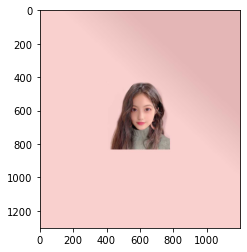

In [124]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

<div style = "height: 50px;"></div>

### 2. 이미지의 얼굴 영역 찾기
<hr/>

#### detector_hog 변수 선언

In [125]:
detector_hog = dlib.get_frontal_face_detector()

<div style = "height: 25px;"></div>

#### detector_hog를 이용해서 얼굴의 bounding box를 추출

In [126]:
dlib_rects = detector_hog(img_rgb, 1)

<div style = "height: 25px;"></div>

#### 찾은 얼굴을 화면에 출력하기

In [127]:
# 찾은 얼굴의 값
print(dlib_rects)

rectangles[[(510, 531) (696, 717)]]


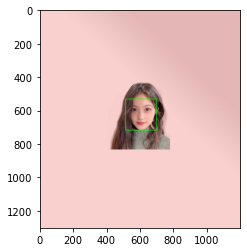

In [128]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType = cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

<div style = "height: 50px;"></div>

### 3. face landmark 찾기
<hr/>

In [129]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    
    list_points = list(map(lambda p : (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

    print(len(list_landmarks[0]))

68


<div style = "height: 50px;"></div>

### 4. face landmark 출력해보기
<hr/>

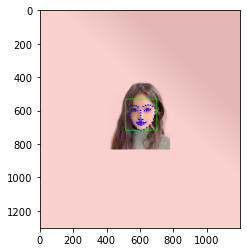

In [130]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 4, (255, 0, 0), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

<div style = "height: 50px;"></div>

### 5. 스티커의 위치 및 크기 구하기
<hr/>

In [131]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print('스티커 붙일 위치 좌표', landmark[30]) 
    
    x = landmark[30][0]  # x_nose값
    y = landmark[30][1] - dlib_rect.height() // 2
    w = dlib_rect.width()
    h = dlib_rect.height()
    
    print('(x, y) 값 : (%d, %d)'%(x, y))
    print('스티커의 크기 (w, h) : (%d, %d)'%(w, h))

스티커 붙일 위치 좌표 (600, 645)
(x, y) 값 : (600, 552)
스티커의 크기 (w, h) : (187, 187)


<div style = "height: 50px;"></div>

### 6. 준비해 둔 스티커 이미지를 읽어서 적용해보기
<hr/>

#### 스티커 이미지 불러오기

In [132]:
sticker_path = 'data/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print('조정된 스티커의 크기 값 : ', img_sticker.shape)

조정된 스티커의 크기 값 :  (187, 187, 3)


<div style = "height: 25px;"></div>

#### 원본 이미지에 스티커 이미지를 추가하기 위해 x, y 좌표를 조정하기

In [133]:
refined_x = x - w // 2
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (507,552)


<div style = "height: 25px;"></div>

#### 원본 이미지에 스티커를 적용하기 전, 이미지 전처리 하기

In [134]:
# mg_show[from:to] 형식
sticker_area = img_bgr[refined_y : refined_y + img_sticker.shape[0], 
                        refined_x : refined_x + img_sticker.shape[1]]

In [135]:
img_bgr[refined_y : refined_y + img_sticker.shape[0],
         refined_x : refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)

<div style = "height: 25px;"></div>

#### 원본 이미지에 스티커 붙이기

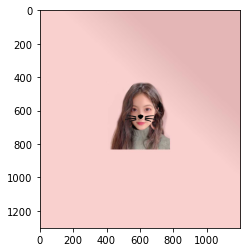

In [136]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

<p style= "font-size:15px; line-height:24px;">landmark가 사진에 맞춰 인식된 것을 확인할 수 있었다. landmark에 따라 스티커 사이즈 또한 잘 조절 것을 확인하였다.</p>

<div style = "height: 50px;"></div>

## 4. 다른 사진 가져와 스티커 붙여보기

- 완전히 다른 이미지를 불러와 작업을 해보겠다.

### (1) 이미지 준비 및 RGB변환하기
<hr/>

In [137]:
img_path = 'data/face05.jpg'
img_bgr = cv2.imread(img_path) # OpenCV로 이미지 불러오기 (원본)
img_show = img_bgr.copy()  # RGB변환 할 이미지 새로운 변수 지정하기

<div style = "height: 25px;"></div>

#### BGR을 RGB로 변환하기

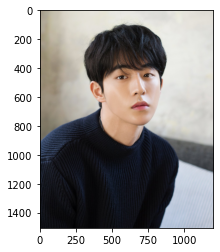

In [138]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

<div style = "height: 50px;"></div>

### 2. 이미지의 얼굴 영역 찾기
<hr/>

#### detector_hog 변수 선언

In [139]:
detector_hog = dlib.get_frontal_face_detector()

<div style = "height: 25px;"></div>

#### detector_hog를 이용해서 얼굴의 bounding box를 추출

In [140]:
dlib_rects = detector_hog(img_rgb, 1)

<div style = "height: 25px;"></div>

#### 찾은 얼굴을 화면에 출력하기

In [141]:
# 찾은 얼굴의 값
print(dlib_rects)

rectangles[[(461, 333) (846, 718)]]


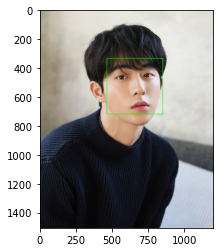

In [142]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType = cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

<div style = "height: 50px;"></div>

### 3. face landmark 찾기
<hr/>

In [143]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    
    list_points = list(map(lambda p : (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

    print(len(list_landmarks[0]))

68


<div style = "height: 50px;"></div>

### 4. face landmark 출력해보기
<hr/>

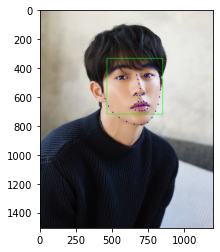

In [144]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 4, (255, 0, 0), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

<div style = "height: 50px;"></div>

### 5. 스티커의 위치 및 크기 구하기
<hr/>

In [145]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print('스티커 붙일 위치 좌표', landmark[30]) 
    
    x = landmark[30][0]  # x_nose값
    y = landmark[30][1] - dlib_rect.height() // 2
    w = dlib_rect.width()
    h = dlib_rect.height()
    
    print('(x, y) 값 : (%d, %d)'%(x, y))
    print('스티커의 크기 (w, h) : (%d, %d)'%(w, h))

스티커 붙일 위치 좌표 (692, 541)
(x, y) 값 : (692, 348)
스티커의 크기 (w, h) : (386, 386)


<div style = "height: 50px;"></div>

### 6. 준비해 둔 스티커 이미지를 읽어서 적용해보기
<hr/>

#### 스티커 이미지 불러오기

In [146]:
sticker_path = 'data/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print('조정된 스티커의 크기 값 : ', img_sticker.shape)

조정된 스티커의 크기 값 :  (386, 386, 3)


<div style = "height: 25px;"></div>

#### 원본 이미지에 스티커 이미지를 추가하기 위해 x, y 좌표를 조정하기

In [147]:
refined_x = x - w // 2
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (499,348)


<div style = "height: 25px;"></div>

#### 원본 이미지에 스티커를 적용하기 전, 이미지 전처리 하기

In [148]:
# mg_show[from:to] 형식
sticker_area = img_bgr[refined_y : refined_y + img_sticker.shape[0], 
                        refined_x : refined_x + img_sticker.shape[1]]

In [149]:
img_bgr[refined_y : refined_y + img_sticker.shape[0],
         refined_x : refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)

<div style = "height: 25px;"></div>

#### 원본 이미지에 스티커 붙이기

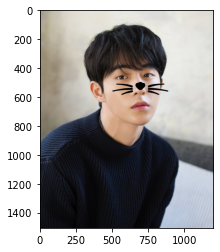

In [150]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

<p style= "font-size:15px; line-height:24px;">사진이 다름에도 불구하고 잘 붙여진 것을 확인할 수 있었다.</p>

<div style = "height: 50px;"></div>

# 회고
<hr/>

<p style= "font-size:16px; line-height:30px;">확실이 눈에 보이고 바로바로 결과가 나오는 것을 확인하다보니 이번 익스는 매우 재밌었습니다.
익스를 진행하면서 지금까지 코드를 이해하지 않고 모델을 수정 및 설계하다보니 많은 것을 놓쳤다는것을 알게 되었습니다. 새로운 코드를 보면 어떻게 작동하는지 잘 이해하지 못한 채 바쁘게 넘어갔는데, 코드를 이해해야 전체적인 과정부터 세부적인 내용까지 수정하고 설계할 수 있다는 것을 깨달았습니다.</p>